In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads (1).csv to Social_Network_Ads (1) (1).csv


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Social_Network_Ads (1).csv')
print("Dataset preview :")
df.head()

Dataset preview :


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy score :")
print(accuracy_score(y_test,y_pred))

Accuracy score :
0.8625


In [ ]:
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred))

Confusion matrix :
[[46  6]
 [ 5 23]]


<Axes: >

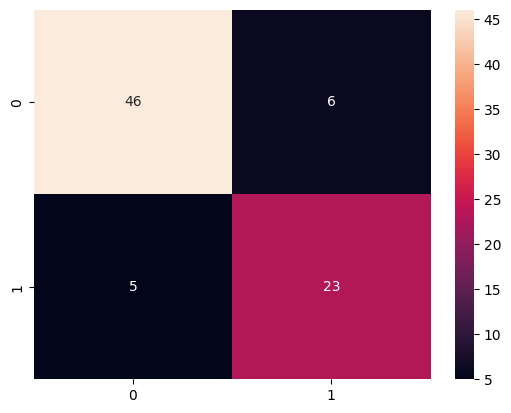

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

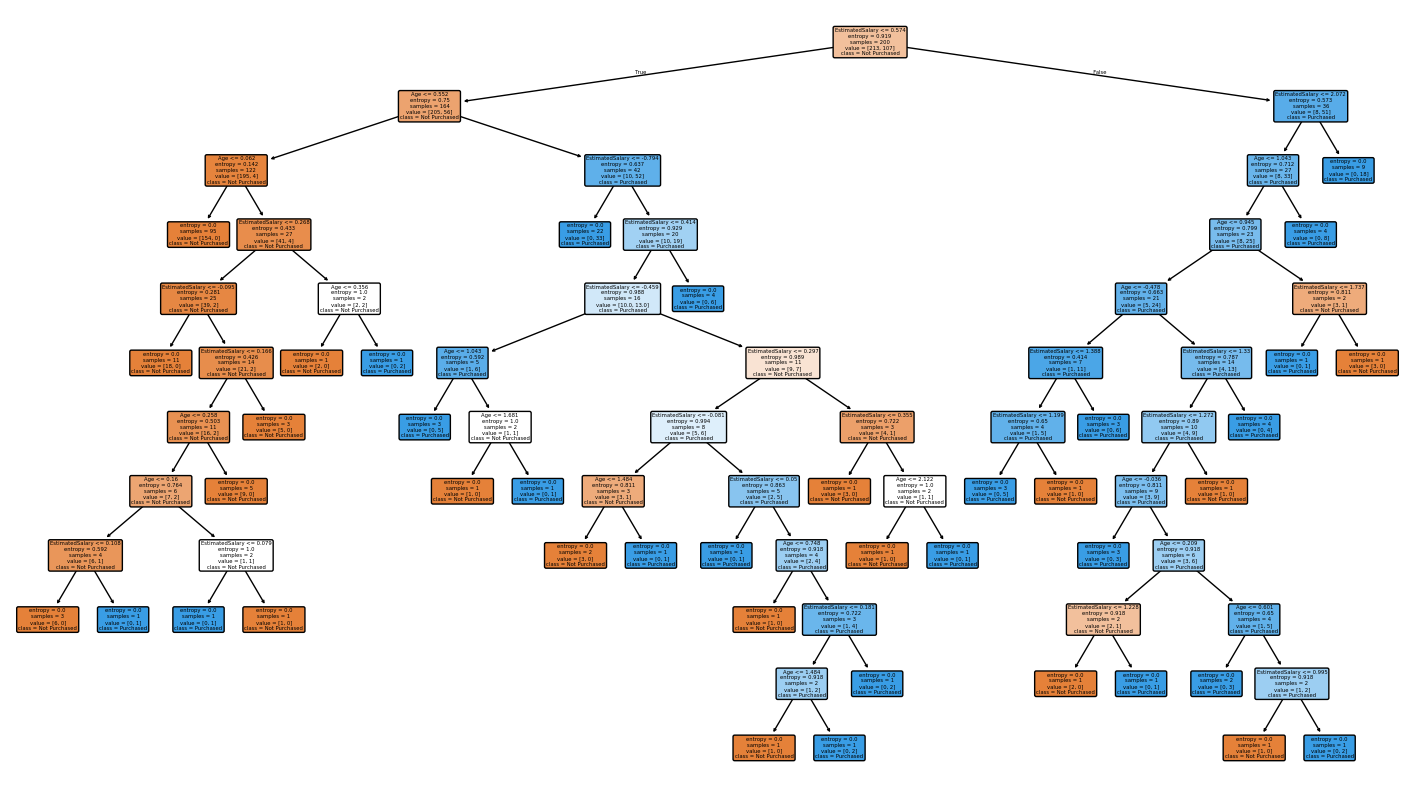

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

third_tree = classifier.estimators_[2]

plt.figure(figsize=(18,10))
plot_tree(
    third_tree,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True
)
plt.show()
